In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,recall_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [23]:
dataset = load_breast_cancer()
dataset.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [24]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [26]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [28]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [30]:
X = df.copy()
y = dataset.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.31)

In [61]:
dtc = DecisionTreeClassifier(ccp_alpha=0.01,max_depth=5)
dtc

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

In [62]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

In [63]:
dtc.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [64]:
prediction = dtc.predict(X_test)

In [65]:
prediction

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1])

In [66]:
dtc.predict_proba(X_test)

# (ccp_alpha=0.01) when 

array([[0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.9765625 , 0.0234375 ],
       [0.9765625 , 0.0234375 ],
       [0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [0.025     , 0.975     ],
       [0.9765625 , 0.0234375 ],
       [0.9765625 , 0.0234375 ],
       [0.025     , 0.975     ],
       [1.        , 0.        ],
       [0.025     , 0.975     ],
       [1.        , 0.        ],
       [0.

In [67]:
print(confusion_matrix(y_test,prediction))

[[ 58   7]
 [  4 108]]


In [68]:
print(accuracy_score(y_test,prediction))

0.9378531073446328


In [69]:
print(classification_report(y_test,prediction,target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.94      0.89      0.91        65
      benign       0.94      0.96      0.95       112

    accuracy                           0.94       177
   macro avg       0.94      0.93      0.93       177
weighted avg       0.94      0.94      0.94       177



In [70]:
print(recall_score(y_test,prediction))

0.9642857142857143


In [71]:
dtc.feature_importances_

array([0.        , 0.0286891 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02530484, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.82608222, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11992384, 0.        , 0.        ])

In [72]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [73]:
feature_importance = pd.DataFrame(dtc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst radius,0.826082
worst concave points,0.119924
mean texture,0.028689
texture error,0.025305
mean radius,0.000000
concavity error,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000


In [74]:
feature_importance[feature_importance[0] >0]

,0
worst radius,0.826082
worst concave points,0.119924
mean texture,0.028689
texture error,0.025305


[Text(279.0, 713.475, 'worst radius <= 16.795\ngini = 0.469\nsamples = 392\nvalue = [147, 245]'),
 Text(139.5, 509.625, 'worst concave points <= 0.142\ngini = 0.148\nsamples = 260\nvalue = [21, 239]'),
 Text(69.75, 305.775, 'gini = 0.049\nsamples = 240\nvalue = [6, 234]'),
 Text(209.25, 305.775, 'mean texture <= 19.71\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(139.5, 101.92499999999995, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(279.0, 101.92499999999995, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(418.5, 509.625, 'texture error <= 0.473\ngini = 0.087\nsamples = 132\nvalue = [126, 6]'),
 Text(348.75, 305.775, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(488.25, 305.775, 'gini = 0.046\nsamples = 128\nvalue = [125, 3]')]

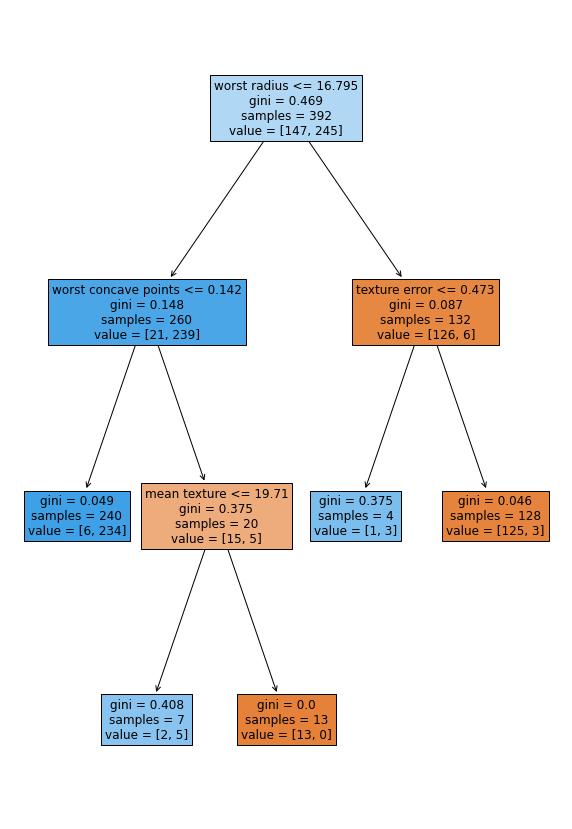

In [78]:
plt.figure(figsize=(10,15))
from sklearn import tree

tree.plot_tree(dtc,filled=True,fontsize=12,feature_names=feature_names)